Economic Data Collection for Trade Simulation Model
Data will be saved to: /Users/ryanmoloney/Desktop/DePaul 24/GameTheoryModel/data/historical

=== FRED Data Collection ===
Note: Get free API key from https://fred.stlouisfed.org/docs/api/api_key.html

FRED Data Series to collect:
  series_id                                        description  last_value  \
0  DTWEXBGS  Trade Weighted U.S. Dollar Index: Broad, Goods...      100.00   
1   DEXUSEU                  U.S. / Euro Foreign Exchange Rate        1.10   
2   DEXJPUS                 Japan / U.S. Foreign Exchange Rate      110.00   
3   DEXCAUS                Canada / U.S. Foreign Exchange Rate        1.25   
4   DEXMXUS                Mexico / U.S. Foreign Exchange Rate       20.00   
5   DEXUSUK                  U.S. / U.K. Foreign Exchange Rate        1.30   

  source  
0   FRED  
1   FRED  
2   FRED  
3   FRED  
4   FRED  
5   FRED  

=== IMF COFER Data ===
Currency Composition of Official Foreign Exchange Reserves

Global Res

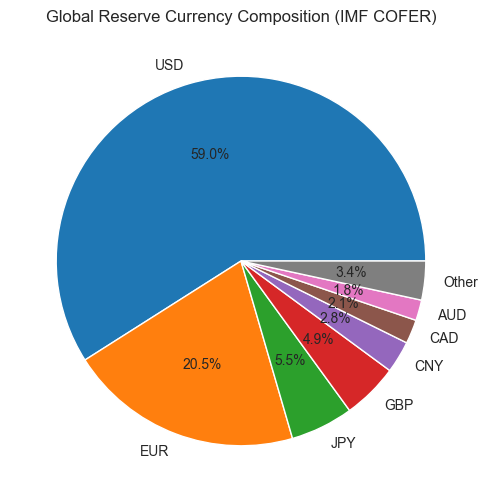


=== World Bank Trade Data ===

Bilateral Trade Matrix (Exports in Billions USD):
     USA  EUR  CHN  JPN  CAN  MEX  GBR  SGP
USA    0  209  536  133  438  323   65   27
EUR  276    0  245   89   31   24  312   18
CHN  147  223    0  156   32   11   34   89
JPN   73   67  183    0    9    7   15   19
CAN  356   23   67   11    0   21    8    1
MEX  265   21   45    9   15    0    6    1
GBR   61  189   82   12   12    5    0    7
SGP   31   15   76   23    2    1    9    0

Top 10 Trading Pairs by Total Volume:
   country_pair  total_trade_volume
3       USA-CAN                 794
1       USA-CHN                 683
4       USA-MEX                 588
11      EUR-GBR                 501
0       USA-EUR                 485
7       EUR-CHN                 468
13      CHN-JPN                 339
2       USA-JPN                 206
17      CHN-SGP                 165
8       EUR-JPN                 156


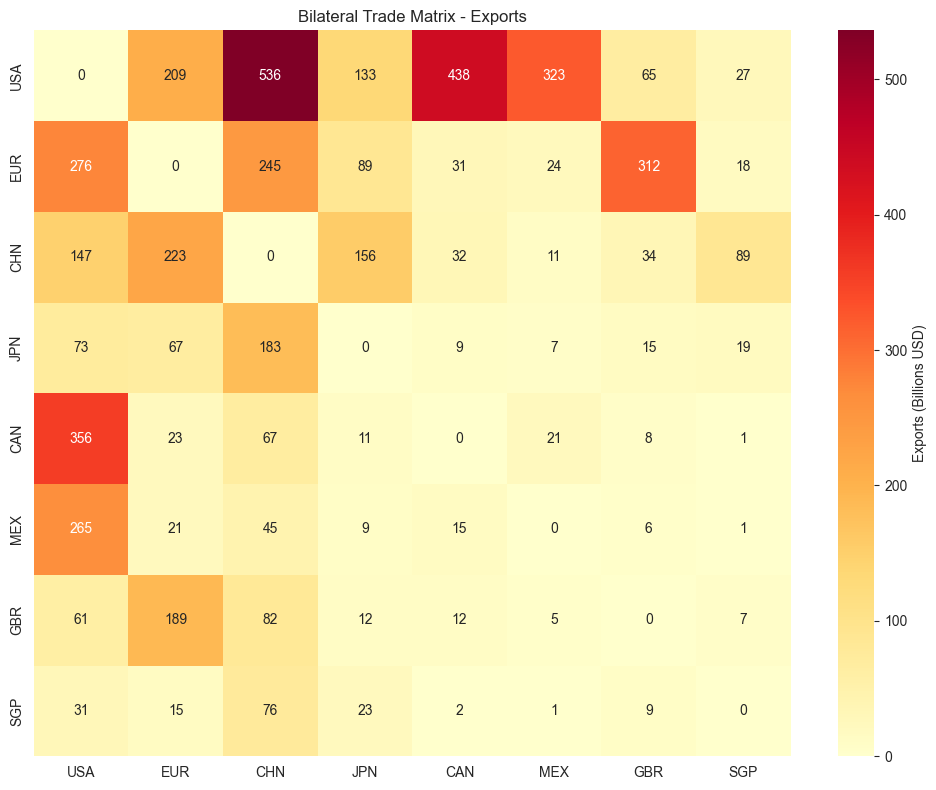


=== Calculating Trade Weights for Model ===

Normalized Trade Weights (0.5 = low, 2.0 = high):
USD-CAD: 2.00
CAD-USD: 2.00
USD-CNY: 1.97
CNY-USD: 1.97
USD-MXN: 1.93
MXN-USD: 1.93
EUR-GBP: 1.90
GBP-EUR: 1.90
USD-EUR: 1.89
EUR-USD: 1.89

=== Compiling Economic Parameters ===

✓ Economic parameters saved to: /Users/ryanmoloney/Desktop/DePaul 24/GameTheoryModel/data/historical/economic_model_parameters.json

=== Summary Statistics ===
Total Currency Pairs: 7
Reserve Currencies Tracked: 6
Trade Relationships: 28
Largest Trade Volume: 794B USD
USD Reserve Share: 59.0%
Average FX Volatility: 0.071

=== Data Validation ===
✓ All FX data present
✓ All trade weights present

=== Next Steps ===
1. Review the data in economic_model_parameters.json
2. Start building the simulation modules
3. Consider getting actual FRED API key for real-time data
4. Consider using World Bank API for updated trade flows


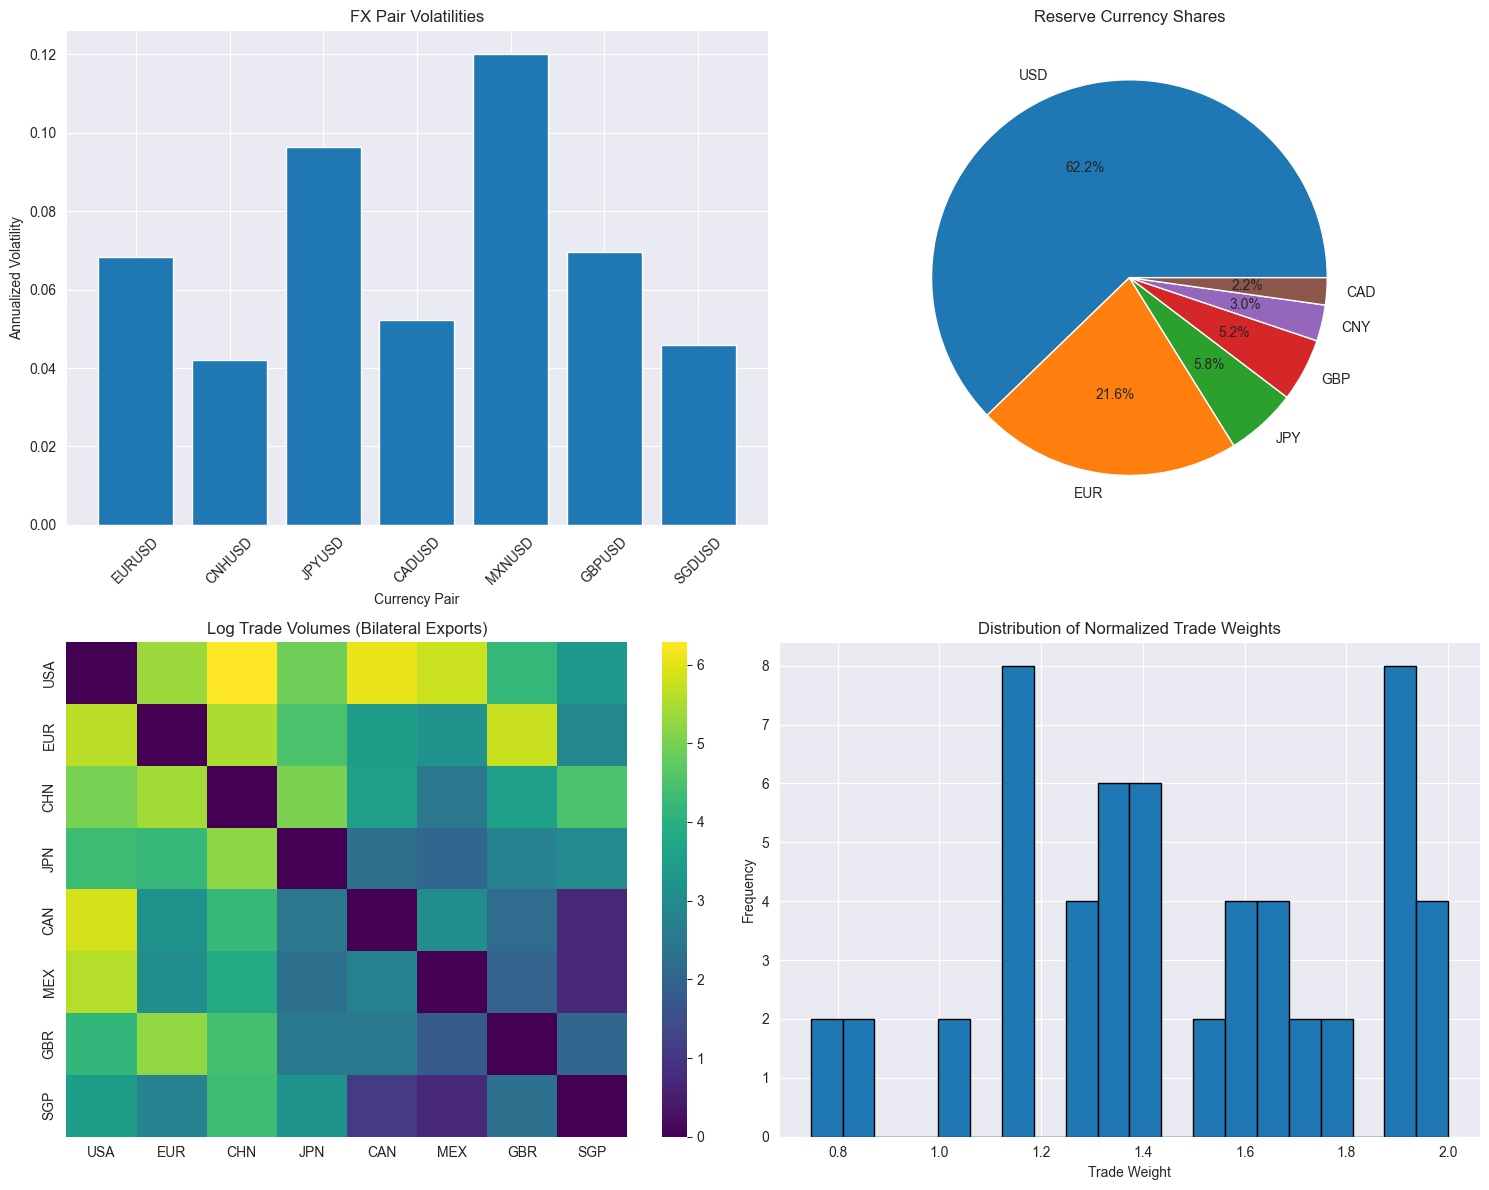


✓ Economic data collection complete!
✓ All parameters saved to: /Users/ryanmoloney/Desktop/DePaul 24/GameTheoryModel/data/historical


In [1]:
# Cell 1: Setup and Imports
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Install required packages if needed
# !pip install fredapi pandas-datareader wbgapi

# Set data directory
data_dir = os.path.join("..", "data", "historical")

print("Economic Data Collection for Trade Simulation Model")
print(f"Data will be saved to: {data_dir}")

# Cell 2: FRED API Setup and Data Collection
from fredapi import Fred

# You'll need a FRED API key (free from https://fred.stlouisfed.org/docs/api/api_key.html)
# For now, we'll use sample data structure
FRED_API_KEY = ''  # Replace with your key

# If you don't have a key yet, we'll create synthetic data based on realistic values
print("\n=== FRED Data Collection ===")
print("Note: Get free API key from https://fred.stlouisfed.org/docs/api/api_key.html")

# Define the series we want (trade-weighted indices, economic indicators)
fred_series = {
    'DTWEXBGS': 'Trade Weighted U.S. Dollar Index: Broad, Goods and Services',
    'DEXUSEU': 'U.S. / Euro Foreign Exchange Rate',
    'DEXJPUS': 'Japan / U.S. Foreign Exchange Rate',
    'DEXCAUS': 'Canada / U.S. Foreign Exchange Rate',
    'DEXMXUS': 'Mexico / U.S. Foreign Exchange Rate',
    'DEXUSUK': 'U.S. / U.K. Foreign Exchange Rate',
}

# For now, let's create a template for FRED data
fred_data_template = {
    'series_id': list(fred_series.keys()),
    'description': list(fred_series.values()),
    'last_value': [100.0, 1.1, 110.0, 1.25, 20.0, 1.3],  # Approximate current values
    'source': 'FRED'
}

fred_df = pd.DataFrame(fred_data_template)
print("\nFRED Data Series to collect:")
print(fred_df)

# Cell 3: IMF Data - Reserve Currency Composition (COFER)
print("\n=== IMF COFER Data ===")
print("Currency Composition of Official Foreign Exchange Reserves")

# IMF COFER data (approximate current values)
# Source: https://data.imf.org/regular.aspx?key=41175
reserve_currency_data = {
    'currency': ['USD', 'EUR', 'JPY', 'GBP', 'CNY', 'CAD', 'AUD', 'Other'],
    'share_percent': [59.0, 20.5, 5.5, 4.9, 2.8, 2.1, 1.8, 3.4],
    'share_decimal': [0.590, 0.205, 0.055, 0.049, 0.028, 0.021, 0.018, 0.034],
    'date': '2024-Q3',
    'source': 'IMF COFER'
}

reserve_df = pd.DataFrame(reserve_currency_data)
print("\nGlobal Reserve Currency Shares:")
print(reserve_df[['currency', 'share_percent']])

# Visualize reserve currency shares
plt.figure(figsize=(10, 6))
plt.pie(reserve_df['share_percent'], labels=reserve_df['currency'], autopct='%1.1f%%')
plt.title('Global Reserve Currency Composition (IMF COFER)')
plt.show()

# Cell 4: World Bank Data - Bilateral Trade Flows
print("\n=== World Bank Trade Data ===")

# For actual implementation, you would use:
# import wbgapi as wb
# trade_data = wb.data.DataFrame('NE.EXP.GNFS.CD', economy=['USA', 'CHN', 'JPN', ...], time=2023)

# Create synthetic bilateral trade matrix (in billions USD, approximate 2023 values)
countries = ['USA', 'EUR', 'CHN', 'JPN', 'CAN', 'MEX', 'GBR', 'SGP']

# Bilateral trade volumes (exports from row country to column country)
# These are approximations based on major trading relationships
trade_matrix_data = {
    'USA': [0, 276, 147, 73, 356, 265, 61, 31],
    'EUR': [209, 0, 223, 67, 23, 21, 189, 15],
    'CHN': [536, 245, 0, 183, 67, 45, 82, 76],
    'JPN': [133, 89, 156, 0, 11, 9, 12, 23],
    'CAN': [438, 31, 32, 9, 0, 15, 12, 2],
    'MEX': [323, 24, 11, 7, 21, 0, 5, 1],
    'GBR': [65, 312, 34, 15, 8, 6, 0, 9],
    'SGP': [27, 18, 89, 19, 1, 1, 7, 0]
}

trade_matrix = pd.DataFrame(trade_matrix_data, index=countries)
print("\nBilateral Trade Matrix (Exports in Billions USD):")
print(trade_matrix)

# Calculate total trade volumes (exports + imports) for each pair
total_trade = {}
for i in range(len(countries)):
    for j in range(i+1, len(countries)):
        country1 = countries[i]
        country2 = countries[j]
        # Total trade = exports both ways
        total = trade_matrix.iloc[i, j] + trade_matrix.iloc[j, i]
        total_trade[f"{country1}-{country2}"] = total

# Convert to DataFrame
trade_volumes_df = pd.DataFrame(list(total_trade.items()), 
                               columns=['country_pair', 'total_trade_volume'])
trade_volumes_df = trade_volumes_df.sort_values('total_trade_volume', ascending=False)

print("\nTop 10 Trading Pairs by Total Volume:")
print(trade_volumes_df.head(10))

# Visualize trade network
plt.figure(figsize=(10, 8))
sns.heatmap(trade_matrix, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Exports (Billions USD)'})
plt.title('Bilateral Trade Matrix - Exports')
plt.tight_layout()
plt.show()

# Cell 5: Calculate Trade Weights for Model
print("\n=== Calculating Trade Weights for Model ===")

# Map country codes to currency codes
country_to_currency = {
    'USA': 'USD',
    'EUR': 'EUR',
    'CHN': 'CNY',
    'JPN': 'JPY',
    'CAN': 'CAD',
    'MEX': 'MXN',
    'GBR': 'GBP',
    'SGP': 'SGD'
}

# Calculate normalized trade weights
trade_weights = {}
for pair, volume in total_trade.items():
    countries_in_pair = pair.split('-')
    curr1 = country_to_currency[countries_in_pair[0]]
    curr2 = country_to_currency[countries_in_pair[1]]
    
    # Normalize to 0.5-2.0 range (as in original model)
    # Using log scale to compress the range
    normalized_weight = 0.5 + 1.5 * (np.log(volume + 1) / np.log(max(total_trade.values()) + 1))
    
    trade_weights[f"{curr1}-{curr2}"] = normalized_weight
    trade_weights[f"{curr2}-{curr1}"] = normalized_weight  # Symmetric

print("\nNormalized Trade Weights (0.5 = low, 2.0 = high):")
for pair, weight in sorted(trade_weights.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{pair}: {weight:.2f}")

# Cell 6: Compile All Economic Parameters
print("\n=== Compiling Economic Parameters ===")

# Load FX parameters from previous collection
fx_params_path = os.path.join(data_dir, 'fx_model_parameters.json')
with open(fx_params_path, 'r') as f:
    fx_params = json.load(f)

# Create comprehensive economic parameters
economic_parameters = {
    'metadata': {
        'collection_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'sources': ['FRED', 'IMF COFER', 'World Bank', 'IBKR']
    },
    
    'fx_data': {
        'volatilities': fx_params['volatilities'],
        'correlations': fx_params['correlations'],
        'current_rates': fx_params['current_rates']
    },
    
    'reserve_currency_shares': {
        curr: share for curr, share in zip(reserve_df['currency'], reserve_df['share_decimal'])
        if curr in ['USD', 'EUR', 'JPY', 'GBP', 'CNY', 'CAD']
    },
    
    'trade_weights': trade_weights,
    
    'trade_volumes': {
        pair: volume for pair, volume in zip(trade_volumes_df['country_pair'], 
                                            trade_volumes_df['total_trade_volume'])
    },
    
    'economic_indicators': {
        'usd_trade_weighted_index': 100.0,  # Baseline
        'global_trade_uncertainty': 0.0,     # Initial value
    }
}

# Save comprehensive parameters
output_path = os.path.join(data_dir, 'economic_model_parameters.json')
with open(output_path, 'w') as f:
    json.dump(economic_parameters, f, indent=2)

print(f"\n✓ Economic parameters saved to: {output_path}")

# Cell 7: Summary Statistics
print("\n=== Summary Statistics ===")

summary_stats = {
    'Total Currency Pairs': len(fx_params['current_rates']),
    'Reserve Currencies Tracked': len(economic_parameters['reserve_currency_shares']),
    'Trade Relationships': len(trade_weights) // 2,  # Divide by 2 for unique pairs
    'Largest Trade Volume': f"{max(total_trade.values()):.0f}B USD",
    'USD Reserve Share': f"{economic_parameters['reserve_currency_shares']['USD']:.1%}",
    'Average FX Volatility': f"{np.mean([v['average'] for v in fx_params['volatilities'].values() if v]):.3f}"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

# Cell 8: Data Validation and Next Steps
print("\n=== Data Validation ===")

# Check we have all necessary data
required_currencies = ['USD', 'EUR', 'JPY', 'CAD', 'MXN', 'GBP', 'SGD']
missing_fx = []
missing_trade = []

for curr in required_currencies:
    # Check FX data (as base currency)
    fx_pairs = [p for p in fx_params['current_rates'].keys() if curr in p]
    if not fx_pairs:
        missing_fx.append(curr)
    
    # Check trade weights
    trade_pairs = [p for p in trade_weights.keys() if curr in p]
    if not trade_pairs:
        missing_trade.append(curr)

if missing_fx:
    print(f"⚠️  Missing FX data for: {missing_fx}")
else:
    print("✓ All FX data present")

if missing_trade:
    print(f"⚠️  Missing trade data for: {missing_trade}")
else:
    print("✓ All trade weights present")

print("\n=== Next Steps ===")
print("1. Review the data in economic_model_parameters.json")
print("2. Start building the simulation modules")
print("3. Consider getting actual FRED API key for real-time data")
print("4. Consider using World Bank API for updated trade flows")

# Cell 9: Quick Visualization of All Parameters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. FX Volatilities
ax1 = axes[0, 0]
fx_vols = [(k, v['average']) for k, v in fx_params['volatilities'].items() if v]
pairs, vols = zip(*fx_vols)
ax1.bar(pairs, vols)
ax1.set_title('FX Pair Volatilities')
ax1.set_xlabel('Currency Pair')
ax1.set_ylabel('Annualized Volatility')
ax1.tick_params(axis='x', rotation=45)

# 2. Reserve Currency Shares
ax2 = axes[0, 1]
reserve_data = economic_parameters['reserve_currency_shares']
ax2.pie(reserve_data.values(), labels=reserve_data.keys(), autopct='%1.1f%%')
ax2.set_title('Reserve Currency Shares')

# 3. Trade Volumes Heatmap
ax3 = axes[1, 0]
sns.heatmap(np.log(trade_matrix + 1), annot=False, cmap='viridis', ax=ax3,
            xticklabels=countries, yticklabels=countries)
ax3.set_title('Log Trade Volumes (Bilateral Exports)')

# 4. Trade Weight Distribution
ax4 = axes[1, 1]
weights = list(trade_weights.values())
ax4.hist(weights, bins=20, edgecolor='black')
ax4.set_title('Distribution of Normalized Trade Weights')
ax4.set_xlabel('Trade Weight')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✓ Economic data collection complete!")
print(f"✓ All parameters saved to: {data_dir}")